In [2]:
import PIL.ImageGrab
import pyautogui
import matplotlib.pyplot as plt
import numpy as np
import time

In [101]:
points = {"Wizard":(770,680),
            "Heli" : (580,520),
            "Home" : (830,820),
            "Restart1" : (1085,810),
            "Restart2" : (1130,720),
            "ClearMonkey" : (1750,820),
            "CleanClick" : (600,100),
            "HeliStay" : (410,400),
            "Start" : (1815,1005),
            "Upgrade1" : (1480,490),
            "Upgrade2" : (1480,635),
            "Upgrade3" : (1480,780),
         }
keys = {"Wizard":'a',
         "Heli" : 'b',
        "Upgrade1" : ",",
        "Upgrade2" : ".",
        "Upgrade3" : "/",
        "Clear" : "Esc",
        "Start" : "space",
         }

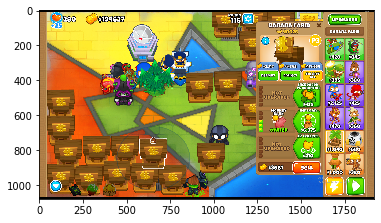

(1080, 1920, 3)


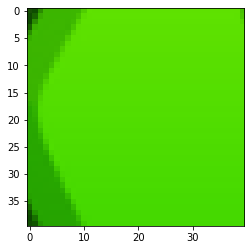

213.481875


In [148]:
def getSnap(debug=False):
    im = PIL.ImageGrab.grab()
    if (debug):
        img = np.array(im)
        plt.imshow(img)
        plt.show()
    print(img.shape)
    return np.array(im)

def getSquare(point,width = 100,height=100,debug=False):
    centerX,centerY = point
    im = PIL.ImageGrab.grab()
    img = np.array(im)
    img = img[(centerY-height):(centerY+height),(centerX-width):(centerX+width)]
    if (debug):
        plt.imshow(img)
        plt.show()
    return img

getSnap(True)
# getSquare((165,380),debug=True).shape
# getSquare((410,400),debug=True).shape
# np.mean(getSquare((1815,1005),width=10,height=10,debug=True))
print(np.mean(getSquare((1480,490),width=20,height=20,debug=True)[:,:,1]))

In [149]:
def placeMonkey(name,debug=False):
    if (debug):
        i = 3
        while (i > 0):
            time.sleep(1)
            print("Placing in " + str(i),end='\r')
            i -= 1
        print()
    print("Dropping " + name)
    pyautogui.moveTo(points[name])
    pyautogui.keyDown(keys[name])
    pyautogui.keyUp(keys[name])
    pyautogui.click(points[name])
    pyautogui.moveTo(points["ClearMonkey"])
    
    
def gameOver(debug=False):
    img = getSquare(points["Restart1"],width=60,height=60,debug=debug)
    if (np.floor(np.mean(img)) == 173):
        print("Game Over")
        return True
    return False
    
def roundOver(debug=False):
    img = getSquare(points['Start'],width=10,height=10,debug=debug)
    if ( np.floor(np.mean(img)) >= 254):
        print("Round Over")
        return True
    return False   

def checkFF(debug=False):
    img = getSquare(points['Start'],width=10,height=10,debug=debug)
    if ( np.floor(np.mean(img)) <= 190):
        startRound()
        print("^Fast Forwarded")

def startRound(debug=False):
    print("Starting new Round")
    pyautogui.click(points["CleanClick"])
    pyautogui.keyDown(keys["Start"])
    pyautogui.keyUp(keys["Start"])

    
def upgradeMonkey(name,upgrade,debug=False):
    if (debug):
        i = 3
        while (i > 0):
            time.sleep(1)
            print("Upgrading in " + str(i),end='\r')
            i -= 1
        print()
    if (np.mean(getSquare(points[upgrade],width=20,height=20,debug=True)[:,:,1]) > 210):
        print("Upgrading "  + name + " to " + upgrade)
        pyautogui.click(points["CleanClick"])
        pyautogui.moveTo(points[name])
        pyautogui.click(points[name])
        pyautogui.keyDown(keys[upgrade])
        pyautogui.keyUp(keys[upgrade])
        pyautogui.click(points["CleanClick"])
    else:
        print("Can't upgrade")

# placeMonkey("Wizard",True)
# placeMonkey("Heli",True)
# upgradeMonkey("Heli","Upgrade2")
# startRound()

In [150]:
def playGame(debug=False):
    i = 3
    while (i > 0):
        time.sleep(1)
        print("Starting Play in " + str(i),end='\r')
        i -= 1
    print("\nPlayin")
    rnd = 5
    state = 0
    while (not(gameOver(debug=debug))):
        if (rnd == 6 and state < 1):
            placeMonkey("Wizard",debug=debug)
        elif (rnd == 7 and state < 1):
            upgradeMonkey("Wizard","Upgrade2",debug=debug)
        elif (rnd == 7):
            upgradeMonkey("Wizard","Upgrade3",debug=debug)
        elif (rnd == 9):
            upgradeMonkey("Wizard","Upgrade2",debug=debug)
        elif (rnd == 13):
            upgradeMonkey("Wizard","Upgrade2",debug=debug)
        elif (rnd == 20):
            placeMonkey("Heli",debug=debug)
        elif (rnd == 21):
            upgradeMonkey("Heli","Upgrade2",debug=debug)
        elif (rnd == 23):
            upgradeMonkey("Heli","Upgrade2",debug=debug)
        elif (rnd == 26):
            upgradeMonkey("Heli","Upgrade1",debug=debug)
        elif (rnd == 27):
            upgradeMonkey("Heli","Upgrade1",debug=debug)
        
        if (roundOver(debug=debug)):
            startRound(debug=debug)
            checkFF()
            rnd+=1
        else:
            time.sleep(2)
playGame()

Starting Play in 1
Playin
Round Over
Starting new Round
Dropping Wizard
Dropping Wizard


KeyboardInterrupt: 